Pos/Time Graph - Data Visualized - __Trial 1__

Importing the __pandas__ library to read our csv data from google sheets

In [65]:
import pandas as pd

Importing numpy and scipy modules to work with our data and fit their respective models with linear or non linear fitting

In [66]:
import numpy as np
from scipy.optimize import curve_fit

Importing our graphing libraries

In [67]:
import matplotlib.pyplot as plt
import scienceplots as sp

Setting the plot to use scientific and grid style graphs

In [68]:
plt.style.use(['science', 'grid', 'notebook', 'no-latex'])

Reading the csv data

In [69]:
trial_two_data = pd.read_csv('trial_two.csv')

Output for trial one data

In [70]:
trial_two_data

,Time,Pos/Disp.
0,0.00,0
1,0.98,3
2,1.47,6
3,1.92,9
4,2.21,12
5,2.58,15
6,3.50,18
7,4.00,21
8,4.31,24
9,4.86,27


Adding our x and y labels to our plots

In [71]:
trial_one_plot = trial_two_data[['Time', 'Pos/Disp.']]

Here we create the graph - as per instruction we have not 'connected' the points, but we just draw a simple interpolation between them to see the graph's structure and where it's taking us. This is how we determine if we need a curve/line of best fit and determine the best 'function' that represents the relationship.

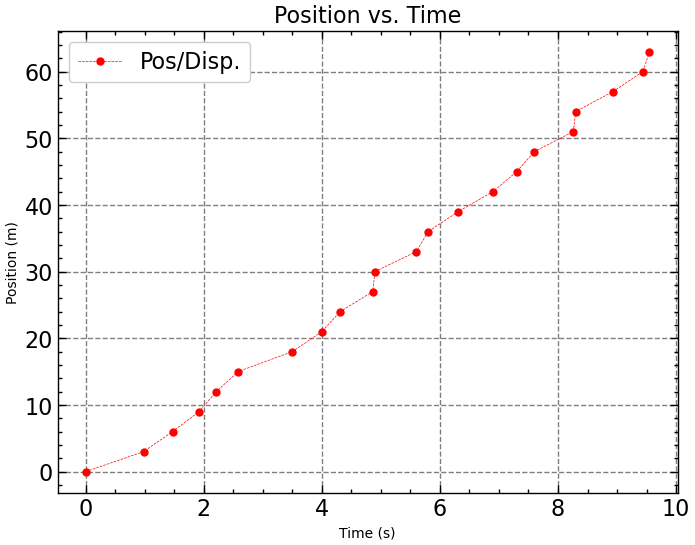

In [72]:
trial_one_plot.plot(x='Time', y='Pos/Disp.', title='Position vs. Time', xlabel='Time (s)', ylabel='Position (m)', linestyle=
                    '--', marker='o', color='red', lw='0.5', ms='5')
plt.show()

The relationship looks to be roughly linear - therefore we now create a 'line' of best fit

Extracting the __x/y__ values (time/pos)

In [73]:
time_values = trial_two_data['Time'].values
position_values = trial_two_data['Pos/Disp.'].values

Defining the function we want to fit

In [74]:
# defining our linear function
def lin_func(x, m, b):
    return (m * x) + b # from y = mx + b where f(x) = y = linear_func()

In [75]:
# performing linear regression
popt, pcov = curve_fit(lin_func, time_values, position_values)

In [76]:
# Get the slope and y-intercept from the fitting parameters
m = popt[0]
b = popt[1]

Plotting the final 'fitted' line with points shown

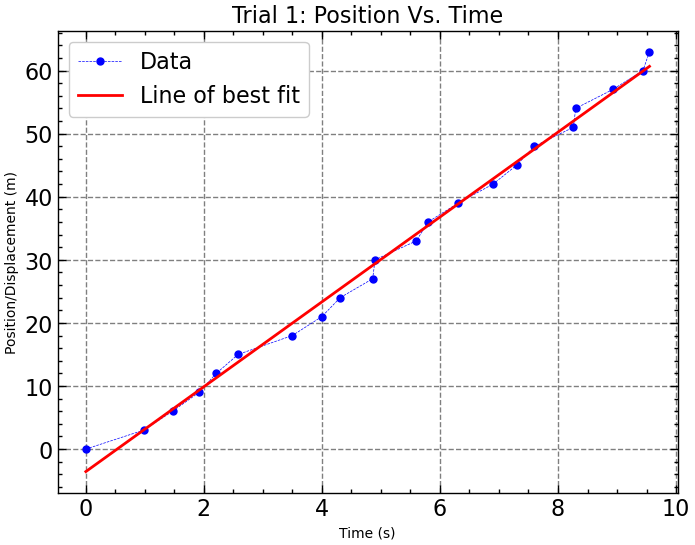

In [77]:
plt.plot(time_values, position_values, linestyle='--', marker='o', color='blue', linewidth='0.5', markersize='5', label='Data')
plt.plot(time_values, lin_func(time_values, m, b), color='red', linestyle='-', label='Line of best fit')
plt.xlabel('Time (s)')
plt.ylabel('Position/Displacement (m)')
plt.title('Trial 1: Position Vs. Time')
plt.legend()
plt.show()

In [78]:
# Printing out the equation for the line of best fit
equation = f'y = ({m:.2f}x) + ({b:.2f})'
print(equation)

y = (6.73x) + (-3.57)


Now we need to create the respective velocity time graph. Recalling that if the position/time graph is linear, then that means velocity is uniform and constant moving in the direction either positive or negative determined by the position/time graph. This also means that there is no acceleration because the velocity is constant. 

To graph the __slopes__ - we need to use the average slope formula which is defined as dy/dx = y2 - y1 / x2 - x1, because this is a line, we do not need to worry about instantaneous velocities, because the velocity is constant at each position in time. Remembering that velocity is a change in position over change in time. So therefore in calculus terms, velocity is the first derivative of the position with respect to time. Therefore velocity is rate of change in position (displacement) over time.

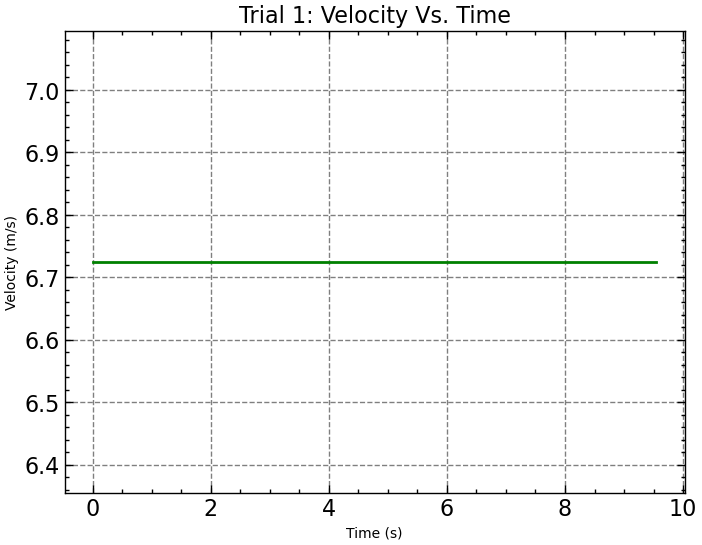

6.725119921512847


In [79]:
# Calculate the derivative
derivative_values = np.full((time_values.size,), m)

# Plot the derivative
plt.plot(time_values, derivative_values, color='green', linestyle='-')

# Add labels and legend to the plot
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Trial 1: Velocity Vs. Time')

# Show the plot
plt.show()

print(m)

Now for the acceleration time graph, which is the second derivative of the position time graph - again it's 0, because velocity is constant

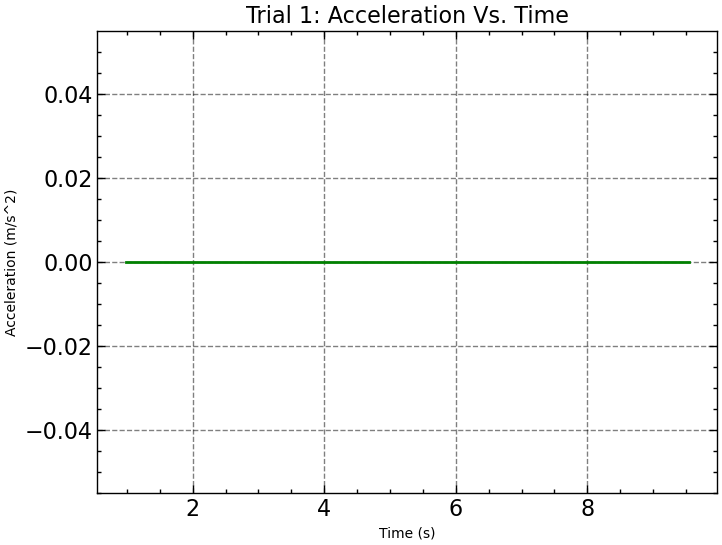

In [80]:
# dy/dx on velocity graph - second derivative using diff()
acceleration_values = np.diff(derivative_values) / np.diff(time_values)

# Plot the second derivative
plt.plot(time_values[1:], acceleration_values, color='green', linestyle='-')

# Add labels to the plot
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Trial 1: Acceleration Vs. Time')

# Show the plot
plt.show()
